In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<AxesSubplot:>

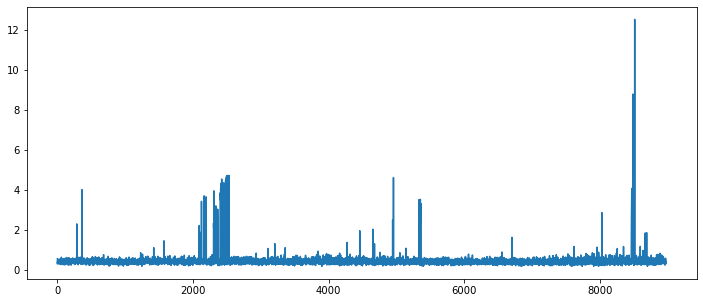

In [2]:
df = pd.read_csv(r'C:\Smita Mahajan\PhD\ML_DL\NW\hsdpump.csv')

df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
index_col = (df['Date'])
df.head()
df.shape
df['Vibration'].plot(figsize=(12,5))

In [3]:
indexedDataset=df.set_index(['Date'])
indexedDataset.columns
#To perform Dicky Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of Dicky Fuller Test')
dftest = adfuller(indexedDataset['Vibration'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index= ['Test Statestic','p-Value','#lags used','Number of Obseravations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s'%key]=value
    
print(dfoutput)
                  

Results of Dicky Fuller Test
Test Statestic                 -8.443276e+00
p-Value                         1.739898e-13
#lags used                      3.700000e+01
Number of Obseravations Used    8.936000e+03
Critical value (1%             -3.431082e+00
Critical value (5%             -2.861863e+00
Critical value (10%            -2.566942e+00
dtype: float64


In [13]:
# THE P VALUE IS PROBABILITY, AND IT SHOULD BE AS SMALL AS POSSIBLEfrom pmdarima import auto_arima
# ARIMA+ AR=Auto Regression (Uses previous values to make the prediction)
#Second order uses past two values for prediction

#MA== Moving average(Uses the past errors to predict the future values)
# Integration (Integrated means differencin)


In [4]:
from pmdarima import auto_arima
#import harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
stepwise_fit=auto_arima(df['Vibration'], trace= True, supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5293.029, Time=10.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6587.271, Time=1.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6278.366, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6144.394, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6585.271, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5279.662, Time=13.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5934.085, Time=1.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5292.922, Time=4.33 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5273.301, Time=12.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5886.276, Time=3.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5258.268, Time=12.65 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5277.119, Time=11.83 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=5259.118, Time=13.87 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=5264.941, Time=11.70 sec
 ARIMA(3,1,2)(0,0,0)[0] in

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8974
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -2618.881
Date:                Tue, 08 Jun 2021   AIC                           5251.762
Time:                        10:58:42   BIC                           5301.476
Sample:                             0   HQIC                          5268.681
                               - 8974                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1238      0.005   -246.025      0.000      -1.133      -1.115
ar.L2          0.2887      0.005     57.008      0.000       0.279       0.299
ar.L3          0.6873      0.003    201.678      0.000       0.681       0.694
ma.L1          0.8371      0.004    197.151      0.000       0.829       0.845
ma.L2         -0.8028      0.003   -317.762      0.000      -0.808      -0.798
ma.L3         -0.9528      0.005   -207.930      0.000      -0.962      -0.944
sigma2         0.1050      0.000    523.097      0.000       0.105       0.105
===================================================================================
Ljung-Box (L1) (Q):                   3.45   Jarque-Bera (JB):          34224167.27
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             4.28
Prob(H) (two-sided):                  0.07   Kurtosis:                       305.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [6]:
#splpit the data in training and testing
print(df.shape)
train= df.iloc[:-2000]
test= df.iloc[-2000:]
print(train.shape, test.shape)


(8974, 9)
(6974, 9) (2000, 9)


In [22]:
# Fit the model

#model= auto_arima(train['Vibration'], order=(3,1,3))

model=ARIMA(train['Vibration'], order=(3,1,3))
#model.fit()
results = model.fit(disp = 0)
#model.summary()
print(results.summary())
            

                             ARIMA Model Results                              
Dep. Variable:            D.Vibration   No. Observations:                 6973
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -819.558
Method:                       css-mle   S.D. of innovations              0.272
Date:                Tue, 08 Jun 2021   AIC                           1655.115
Time:                        11:07:28   BIC                           1709.913
Sample:                             1   HQIC                          1674.001
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.567e-06      0.000     -0.011      0.992      -0.000       0.000
ar.L1.D.Vibration    -0.5889      0.070     -8.444      0.000      -0.726      -0.452
ar.L2.D.Vibration     0.

In [23]:
start=len(train)
end = len(train)+len(test)-1
results_pred= results.predict(start=start,end=end,typ ='levels')
results_pred.index=df.Date[start:end+1]
print(results_pred)

Date
2020-03-17 03:13:00    0.347477
2020-03-17 04:13:00    0.365287
2020-03-17 05:13:00    0.365056
2020-03-17 06:13:00    0.387922
2020-03-17 07:13:00    0.379885
                         ...   
2020-06-08 06:16:00    0.403147
2020-06-08 07:16:00    0.403145
2020-06-08 08:16:00    0.403142
2020-06-08 10:16:00    0.403139
2020-06-08 11:15:00    0.403137
Length: 2000, dtype: float64


<AxesSubplot:xlabel='Date'>

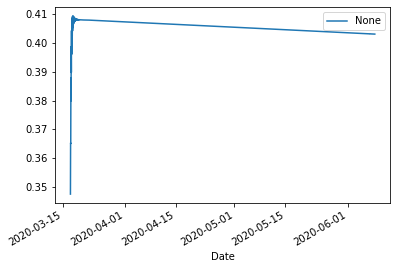

In [24]:
results_pred.plot(legend=True)


<AxesSubplot:>

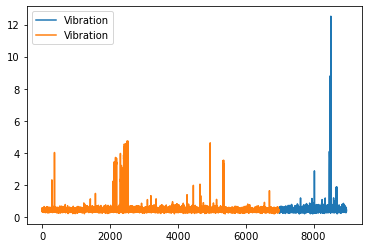

In [25]:
test['Vibration'].plot(legend=True)
train['Vibration'].plot(legend=True)

In [26]:
test['Vibration'].mean()

0.4924861710220001

In [27]:
# Fit the model #2

#model= auto_arima(train['Vibration'], order=(,21,2))

model=ARIMA(train['Vibration'], order=(2,1,2))
#model.fit()
results = model.fit(disp = 0)
#model.summary()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Vibration   No. Observations:                 6973
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -824.915
Method:                       css-mle   S.D. of innovations              0.272
Date:                Tue, 08 Jun 2021   AIC                           1661.829
Time:                        11:08:09   BIC                           1702.928
Sample:                             1   HQIC                          1675.994
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.501e-06      0.000     -0.010      0.992      -0.000       0.000
ar.L1.D.Vibration     0.4293      0.066      6.476      0.000       0.299       0.559
ar.L2.D.Vibration     0.

In [28]:
# for  model #2 Prediction 
start=len(train)
end = len(train)+len(test)-1
results_pred= results.predict(start=start,end=end,typ ='levels')
results_pred.index=df.Date[start:end+1]
print(results_pred)

Date
2020-03-17 03:13:00    0.358668
2020-03-17 04:13:00    0.361759
2020-03-17 05:13:00    0.375597
2020-03-17 06:13:00    0.382335
2020-03-17 07:13:00    0.388804
                         ...   
2020-06-08 06:16:00    0.403662
2020-06-08 07:16:00    0.403660
2020-06-08 08:16:00    0.403657
2020-06-08 10:16:00    0.403655
2020-06-08 11:15:00    0.403652
Length: 2000, dtype: float64


<AxesSubplot:xlabel='Date'>

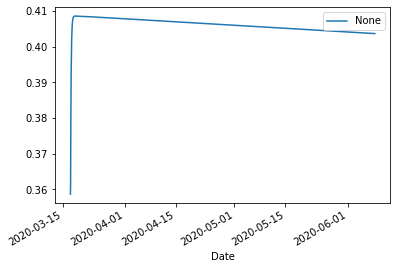

In [29]:
results_pred.plot(legend=True)


<AxesSubplot:>

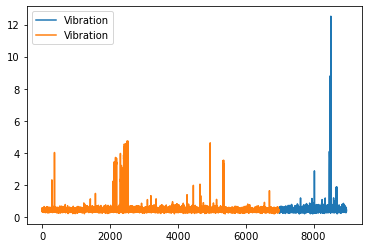

In [30]:
test['Vibration'].plot(legend=True)
train['Vibration'].plot(legend=True)

In [ ]:
# Fitting the model on overall dataset

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(results_pred,test['Vibration']))
print(rmse)

# Please note that the mean value and the rmse value almost same

0.6767738336949094


In [32]:
model_all=ARIMA(train['Vibration'], order=(3,1,3))
results_all = model.fit(disp = 0)
df.tail()

,Date,Vibration,Temperature,IR,IY,IB,VR,VY,VB
8969,2020-06-08 06:16:00,0.371849,24.218559,0.0,0.04,0.12000,0.0,0.0,0.0
8970,2020-06-08 07:16:00,0.412422,24.096489,0.0,0.04,0.10214,0.0,0.0,0.0
8971,2020-06-08 08:16:00,0.382393,24.706841,0.0,0.04,0.03000,0.0,0.0,0.0
8972,2020-06-08 10:16:00,0.382000,27.637000,0.0,0.04,0.12000,0.0,0.0,0.0
8973,2020-06-08 11:15:00,0.413000,30.078000,0.0,0.16,0.03000,0.0,0.0,0.0


In [134]:
df.head()


,Date,Vibration,Temperature,IR,IY,IB,VR,VY,VB
0,2019-06-01 00:00:00,0.565557,25.805473,0.16759,0.127688,0.015961,31.594692,31.754303,30.9802
1,2019-06-01 01:00:00,0.303960,24.950981,0.16759,0.127688,0.015961,31.594692,31.754303,30.9802
2,2019-06-01 02:00:00,0.411822,24.462700,0.16759,0.127688,0.015961,31.594692,31.754303,30.9802
3,2019-06-01 03:00:00,0.378512,23.974419,0.16759,0.127688,0.015961,31.594692,31.754303,30.9802
4,2019-06-01 04:00:00,0.391413,23.852348,0.16759,0.127688,0.015961,31.594692,31.754303,30.9802


In [51]:
#redicitng next 10 values
#start=len(train)
start=1
#nd = len(train)+len(test)+10
end= 10

future_date=pd.date_range(start= start, end= end)
#start, end, periods, and freq

final_predict= results_all.predict(start=start,end=end,typ ='levels')
#inal_predict.index=df.Date[start:end+10]
#final_predict.index=future_date
print(final_predict)

1     0.565555
2     0.374804
3     0.401207
4     0.402943
5     0.400380
6     0.438959
7     0.386784
8     0.410328
9     0.396631
10    0.450457
dtype: float64
